<h2>Introduction to Python</h2>

<h3>Session 2</h3>
    <ul>
        <li>Input/Ouptut</li>
        <li>Modules</li>
        <li>LXML</li>
        <li>Pandas</li>
        <li>Plotting</li>
    </ul>

<h2>Input/Output</h2> <br>
<h4>Reading files</h4>

To read simple txt files you can use the build-in function open().
open() takes two arguments. The first one defines the path to the file
you want to read. The second arugemt determines the reading mode.
Reading modes:

"r" - Read - Default value. Opens a file for reading, error if the file does not exist <br>

"a" - Append - Opens a file for appending, creates the file if it does not exist <br>

"w" - Write - Opens a file for writing, creates the file if it does not exist <br>

"x" - Create - Creates the specified file, returns an error if the file exist <br>

"t" - Text - Default value. Text mode <br>

"b" - Binary - Binary mode (e.g. images) <br>

After reading/appending/writing a file it is important to close it again to free memory.
It is done with the close() method.

In [ ]:
data = open("article.txt","rt")
print(data)
print(type(data))
data.close()

If we try to print the text from article.txt, we would expect to see its content.
Instead we get an object of the io.TextIOWrapper class. To actually read its text
we have to use the read() method.

In [ ]:
data = open("article.txt","rt")
text = data.read()
print(text)
data.close()

Sometimes it is not necessary to read the whole file at once, since large files
tend to block a lot of memory and could slow down our code. By looping over
io.TextIOWrapper in a for-loop we can process each line seperatly.

In [ ]:
data = open("article.txt","rt")
for line in data:
    print(line)
data.close()

It is common to open files within a with-block. This has the advantage that the file is automatically closed again as soon as the block is left. If we store the file content in a variable we can work with it even if we closed the file.

In [ ]:
with open("article.txt","rt") as file:
    text = file.read()
print(text)

<h4>Writing files</h4>

In case we want to write something on our filesystem, we can use the open() function
in a similar way. Instead of read() you have to use write(). 

In [12]:
text = ""
file = open("my_first_file.txt","wt")
file.write(text)#
file.close()

Check if your first file was created correctly!
Let's append it with another line of text.

In [13]:
text = ""
file = open("my_first_file.txt","at")
file.write(text)
file.close()

<h2>Modules</h2>

Fortunately, there is a large community of python users and many of them offer their code for further use. The import of foreign classes and functions is organized by so-called modules or libraries. To use and structure these for our own projects, import statements are used at the beginning of a python script.<br>
We start with importing the numpy library.

In [19]:
import numpy
print(type(numpy))

<class 'module'>


We could talk about numpy forever. Roughly speaking, the core of numpy is the numpy array, a data type that is very similar to the python list, but has an extensive repertoire of functions to perform very fast linear algebra calculations.
It is build like this:

In [21]:
my_array = numpy.array([1,2,3,4,5])
print(my_array)

[1 2 3 4 5]


If you plan on using a lot of numpy in your code it gets annoying to type "numpy" every single time.
For this reason python allows to define an alias for modules like this:

In [22]:
import numpy as np

my_array = np.array([1,2,3,4,5])
print(my_array)

[1 2 3 4 5]


Following the same logic, it is possible to import a single function or class of a module in a way that no alias is needed anymore.

In [23]:
from numpy import array

my_array = array([1,2,3,4,5])
print(my_array)

[1 2 3 4 5]


<h2>lxml</h2>

lxml is a python package designed to handle xml data. It is useful to acess elements,
attributes or text within xml and handles xpath expressions. Lets start with opening a
xml file without lxml:

In [40]:
file = open("ENG18482_Gaskell.xml","r")
xml = file.read()
print(xml)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="../../WG1/distantreading.github.io/Schema/eltec-1.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:lang="en" xml:id="ENG18482">
<teiHeader>
<fileDesc>
<titleStmt>
<title>Mary Barton: A Tale of Manchester Life : ELTeC edition</title>
<author  ref="viaf:39377536">Gaskell, Elizabeth Cleghorn (1810-1865)</author>
<respStmt>
<resp>ELTeC conversion</resp>
<name>Lou Burnard</name>
</respStmt>
</titleStmt>
<extent><measure unit="words">161538</measure></extent>
<publicationStmt>
<p>Published as part of ELTeC <date>2019-01-15</date></p>
</publicationStmt>
<sourceDesc>
<bibl><title>The Project Gutenberg eBook of Mary Barton, by Elizabeth Cleghorn Gaskell</title><ref
target="gut:2153">Gutenberg</ref>
<respStmt><resp>Original data capture</resp>
<name>Les Bowler</name>
<name>Joseph E. Loewenstein, M.D.
</name></respStmt>
<relatedItem>
<bibl type="copyText" n="B6955"

This is okay, at least we can read a file this way. But basicly thats all. lxml gives us the oppotunity to work with xml. We start with the import statement.

In [41]:
from lxml import etree

lxml inherits a class for xml files, the ElementTree-class. First we need to load our xml as instance of this class:

In [60]:
xml = etree.parse("ENG18482_Gaskell.xml")
print(type(xml))

<class 'lxml.etree._ElementTree'>


Maybe we are intrested in headings. These should be found inside head elemtents (at least thats what elte-tei  standard promises)

In [52]:
headings = xml.findall("head")
print(headings)

[]


Okay, suprisingly wo got zero heading. <br>
But looking in the xml file its clear that there
have to some of them somewhere.<br>
We forgot to define namespaces...

In [89]:
namespace = {"TEI": "http://www.tei-c.org/ns/1.0"}
headings = xml.xpath("//TEI:head", namespaces=namespace)
print(headings)

[<Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61174908>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcdc8>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcd88>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fce08>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcc88>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcfc8>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcf88>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcec8>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61301048>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd612fcf48>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61301088>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd613010c8>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61301108>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61301148>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61301188>, <Element {http://www.tei-c.org/ns/1.0}head at 0x7fbd61

We have again received rather unpleasant output. We should check the data type of headings:

In [90]:
print(type(headings))

<class 'list'>


Okay, its a list. But what is inside this list?

In [92]:
print(type(headings[0]))

<class 'lxml.etree._Element'>


We got instances of class etree.Element.. <br>
If you stuble upon something you have no idea how to handle it, it's
never a bad idea to ask at stackoverflow.com:
https://stackoverflow.com/questions/30772943/get-inner-text-from-lxml

In [91]:
print(headings[0].text)

PREFACE.  


Alright, now we can print every heading within a for loop!!

In [88]:
for heading in headings:
    
    print(heading.text)

PREFACE.  
CHAPTER I.
A MYSTERIOUS DISAPPEARANCE.
CHAPTER II.
A MANCHESTER TEA-PARTY.
CHAPTER III.
JOHN BARTON'S GREAT TROUBLE.
CHAPTER IV.
OLD ALICE'S HISTORY.
CHAPTER V.
THE MILL ON FIRE—JEM WILSON TO THE RESCUE.
CHAPTER VI.
POVERTY AND DEATH.
CHAPTER VII.
JEM WILSON'S REPULSE.
CHAPTER VIII.
MARGARET'S DEBUT AS A PUBLIC SINGER.
CHAPTER IX.
BARTON'S LONDON EXPERIENCES.
CHAPTER X.
RETURN OF THE PRODIGAL.
CHAPTER XI.
MR. CARSON'S INTENTIONS REVEALED.
CHAPTER XII.
OLD ALICE'S BAIRN.
CHAPTER XIII.
A TRAVELLER'S TALES.
CHAPTER XIV.
JEM'S INTERVIEW WITH POOR ESTHER.
CHAPTER XV.
A VIOLENT MEETING BETWEEN THE RIVALS.
CHAPTER XVI.
MEETING BETWEEN MASTERS AND WORKMEN.
CHAPTER XVII.
BARTON'S NIGHT-ERRAND.
CHAPTER XVIII.
MURDER.
CHAPTER XIX.
JEM WILSON ARRESTED ON SUSPICION.
CHAPTER XX.
MARY'S DREAM—AND THE AWAKENING.
CHAPTER XXI.
ESTHER'S MOTIVE IN SEEKING MARY.
CHAPTER XXII.
MARY'S EFFORTS TO PROVE AN ALIBI.
CHAPTER XXIII.
THE SUB-PŒNA.
CHAPTER XXIV.
WITH THE DYING.
CHAPTER XXV.
MRS. WILSON'S D

<h2>pandas</h2>

One can imagine pandas as a python variant of ms excel. It is usefull
for orangisation, storing and analysing your data alongside with its
metadata. The basic element of pandas is the DataFrame

In [1]:
import pandas as pd

In [3]:
frame = pd.DataFrame()
print(frame)

Empty DataFrame
Columns: []
Index: []


A DataFrame contains an index (rows, axis 0) and columns (axis 1), along with the actual data. We start by creating an empty frame and add three named columns.

In [5]:
frame = pd.DataFrame()
frame["author_lastname"] = ["Gaskell","Dickens","Eliot"]
frame["author_forename"] = ["Elisabeth","Charles","George"]
frame["title"] = ["Mary Barton","Hard Times","Middlemarch"]
frame

,author_lastname,author_forename,title
0,Gaskell,Elisabeth,Mary Barton
1,Dickens,Charles,Hard Times
2,Eliot,George,Middlemarch


Now we can access values by selecting fields via conditions in brackets. This expression reads:
Give me all titles of novels written by Gaskell

In [6]:
frame[frame.author_lastname == "Gaskell"]["title"]

0    Mary Barton
Name: title, dtype: object

We can save DataFrames to our disk with to_csv().
The sep-argument determines a character, that will be
used to separate values. You should always make sure
this character is not containd by any field in your
dataFrame since it would corrupt the file and make
it unreadable.

In [7]:
frame.to_csv("my_first_table.tsv", sep="\t")

The counterpart to to_csv() is from_csv(). <br>
Lets try to load an example file:

In [8]:
frame = pd.read_csv("dtm_example.tsv", sep="\t", index_col=0)
frame

,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,...,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57
the,12069.0,4568.0,10847.0,11962.0,19825.0,8346.0,4501.0,3315.0,17336.0,2510.0,...,13598.0,9329.0,581.0,6838.0,9418.0,11025.0,9754.0,7489.0,8636.0,4382.0
and,9938.0,4742.0,6608.0,5142.0,8082.0,4759.0,4291.0,4183.0,13728.0,2727.0,...,12019.0,5366.0,312.0,5693.0,6642.0,5952.0,5570.0,5916.0,6176.0,3230.0
to,6489.0,3536.0,5150.0,3654.0,9599.0,4226.0,2878.0,1556.0,9597.0,2384.0,...,10360.0,3802.0,351.0,4875.0,4246.0,4900.0,7095.0,6443.0,6132.0,2597.0
of,5425.0,2224.0,4609.0,5635.0,8339.0,4204.0,2460.0,1344.0,9324.0,1603.0,...,8627.0,4598.0,337.0,3714.0,5283.0,6040.0,4252.0,3886.0,5038.0,2594.0
a,6947.0,2322.0,4038.0,2586.0,5244.0,3392.0,2280.0,1467.0,7279.0,1300.0,...,7840.0,3400.0,269.0,2981.0,3131.0,4435.0,4337.0,3215.0,4771.0,2135.0
i,3961.0,4080.0,2962.0,1600.0,7132.0,2782.0,2138.0,590.0,5898.0,2277.0,...,12953.0,2482.0,118.0,2679.0,2317.0,2320.0,4286.0,3899.0,3292.0,1888.0
in,3649.0,1481.0,2767.0,2166.0,6120.0,2566.0,1542.0,879.0,5440.0,921.0,...,6161.0,2282.0,190.0,2385.0,2411.0,2813.0,3694.0,2328.0,3104.0,1627.0
he,4859.0,2127.0,3112.0,1546.0,4431.0,2387.0,1871.0,1421.0,4166.0,694.0,...,3588.0,1869.0,230.0,2432.0,1853.0,2064.0,3610.0,3572.0,2442.0,1255.0
that,2642.0,1249.0,2570.0,1840.0,3325.0,2022.0,1306.0,897.0,3652.0,789.0,...,5293.0,2113.0,159.0,1603.0,1948.0,2326.0,2915.0,2774.0,2997.0,1363.0
was,2907.0,1129.0,2130.0,1377.0,3173.0,1806.0,987.0,843.0,4260.0,1006.0,...,5305.0,1538.0,200.0,2094.0,1298.0,1861.0,3322.0,2477.0,3076.0,676.0


This table holds token counts for 57 english novels. Document names are stored in
the columns and words in its index. If we want to know how often a word is contained
by a certain document we can just type:

In [9]:
frame.loc["the","d01"]

12069.0

Just as well we can compare the word frequencies of several documents and words.

In [10]:
frame.loc[["he","she"],["d01","d22","d34"]]

,d01,d22,d34
he,4859.0,1895.0,4037.0
she,664.0,1475.0,1242.0


In addition we can select values by numerical indexing:

In [11]:
frame.iloc[[1,2,4],[2,4,6]]

,d03,d05,d07
and,6608.0,8082.0,4291.0
to,5150.0,9599.0,2878.0
a,4038.0,5244.0,2280.0


Sorting is also possible

In [12]:
frame.sort_values(["d01"], ascending=False)

,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,...,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57
the,12069.0,4568.0,10847.0,11962.0,19825.0,8346.0,4501.0,3315.0,17336.0,2510.0,...,13598.0,9329.0,581.0,6838.0,9418.0,11025.0,9754.0,7489.0,8636.0,4382.0
and,9938.0,4742.0,6608.0,5142.0,8082.0,4759.0,4291.0,4183.0,13728.0,2727.0,...,12019.0,5366.0,312.0,5693.0,6642.0,5952.0,5570.0,5916.0,6176.0,3230.0
a,6947.0,2322.0,4038.0,2586.0,5244.0,3392.0,2280.0,1467.0,7279.0,1300.0,...,7840.0,3400.0,269.0,2981.0,3131.0,4435.0,4337.0,3215.0,4771.0,2135.0
to,6489.0,3536.0,5150.0,3654.0,9599.0,4226.0,2878.0,1556.0,9597.0,2384.0,...,10360.0,3802.0,351.0,4875.0,4246.0,4900.0,7095.0,6443.0,6132.0,2597.0
of,5425.0,2224.0,4609.0,5635.0,8339.0,4204.0,2460.0,1344.0,9324.0,1603.0,...,8627.0,4598.0,337.0,3714.0,5283.0,6040.0,4252.0,3886.0,5038.0,2594.0
he,4859.0,2127.0,3112.0,1546.0,4431.0,2387.0,1871.0,1421.0,4166.0,694.0,...,3588.0,1869.0,230.0,2432.0,1853.0,2064.0,3610.0,3572.0,2442.0,1255.0
i,3961.0,4080.0,2962.0,1600.0,7132.0,2782.0,2138.0,590.0,5898.0,2277.0,...,12953.0,2482.0,118.0,2679.0,2317.0,2320.0,4286.0,3899.0,3292.0,1888.0
you,3870.0,1883.0,2641.0,605.0,3685.0,1832.0,1540.0,819.0,3587.0,772.0,...,3626.0,1654.0,111.0,1392.0,1865.0,2047.0,3070.0,3406.0,2728.0,1377.0
in,3649.0,1481.0,2767.0,2166.0,6120.0,2566.0,1542.0,879.0,5440.0,921.0,...,6161.0,2282.0,190.0,2385.0,2411.0,2813.0,3694.0,2328.0,3104.0,1627.0
his,3596.0,1424.0,3056.0,1665.0,3939.0,1941.0,1230.0,566.0,5172.0,430.0,...,2925.0,2098.0,195.0,1522.0,1604.0,2458.0,2163.0,2282.0,1964.0,1319.0


Sometimes its usefull to flip rows and columns:

In [13]:
frame = frame.T
frame

In [14]:
frame.sort_values("she",ascending=False)["she"]

d15    3682.0
d19    3218.0
d13    3183.0
d47    2980.0
d27    2906.0
d41    2860.0
d48    2746.0
d51    2542.0
d39    2394.0
d17    2316.0
d36    2195.0
d54    2175.0
d09    2135.0
d23    2053.0
d56    2031.0
d24    1934.0
d55    1780.0
d31    1762.0
d26    1739.0
d42    1658.0
d18    1642.0
d05    1626.0
d45    1626.0
d46    1576.0
d22    1475.0
d21    1429.0
d06    1419.0
d02    1334.0
d20    1282.0
d34    1242.0
d43    1212.0
d03    1005.0
d44     993.0
d52     968.0
d12     913.0
d04     864.0
d14     852.0
d07     818.0
d30     815.0
d32     760.0
d38     702.0
d01     664.0
d10     628.0
d11     569.0
d53     532.0
d37     518.0
d29     453.0
d08     420.0
d40     418.0
d57     399.0
d28     389.0
d49     384.0
d16     360.0
d25     334.0
d35     203.0
d50      82.0
d33      61.0
Name: she, dtype: float64

We can calculate the sum of a whole row or column with
the sum() operator. The same applies for mean().

In [16]:
frame.loc["d01"].sum()

165900.0

In [17]:
frame["and"].sum()

353830.0

In [18]:
frame["and"].mean()

6207.543859649123

If we want really want to compare word counts in novels, it
does not seem to be reasonable to look at absolute values. 
Instead we should transform our data into relative frequencies.
To do so we have to get the total count of words in each document
and divide every single word count by that value.

In [22]:
frame = frame.div(frame.sum(axis=1), axis=0)
frame

,the,and,to,of,a,i,in,he,that,was,...,done,myself,found,under,quite,half,moment,heard,get,always
d01,0.072749,0.059904,0.039114,0.032700,0.041875,0.023876,0.021995,0.029289,0.015925,0.017523,...,0.001061,0.000338,0.001591,0.001013,0.000374,0.001465,0.001664,0.000808,0.001157,0.000862
d02,0.058805,0.061045,0.045519,0.028630,0.029891,0.052522,0.019065,0.027381,0.016079,0.014534,...,0.000798,0.001455,0.000618,0.001081,0.000618,0.001120,0.000476,0.001017,0.001545,0.000669
d03,0.092673,0.056456,0.044000,0.039378,0.034499,0.025306,0.023640,0.026588,0.021957,0.018198,...,0.000666,0.000521,0.001034,0.000641,0.000513,0.000940,0.000965,0.001179,0.000624,0.001034
d04,0.142666,0.061327,0.043580,0.067207,0.030842,0.019083,0.025833,0.018439,0.021945,0.016423,...,0.000334,0.000620,0.000847,0.000739,0.000119,0.001157,0.001121,0.001217,0.000131,0.000525
d05,0.100575,0.041001,0.048697,0.042305,0.026603,0.036182,0.031048,0.022479,0.016868,0.016097,...,0.000999,0.001720,0.001076,0.001628,0.001177,0.000700,0.001862,0.001010,0.000928,0.000416
d06,0.086452,0.049296,0.043775,0.043547,0.035136,0.028817,0.026580,0.024726,0.020945,0.018707,...,0.000984,0.000653,0.000932,0.001243,0.000580,0.001699,0.000694,0.000839,0.000994,0.000994
d07,0.062948,0.060011,0.040250,0.034404,0.031887,0.029901,0.021566,0.026167,0.018265,0.013804,...,0.001105,0.000839,0.001175,0.000685,0.000713,0.001664,0.001427,0.001147,0.000979,0.000797
d08,0.069343,0.087499,0.032548,0.028114,0.030687,0.012342,0.018387,0.029724,0.018763,0.017634,...,0.000586,0.000126,0.001360,0.001485,0.002636,0.000669,0.000607,0.001088,0.002029,0.000983
d09,0.077603,0.061452,0.042960,0.041738,0.032584,0.026402,0.024352,0.018649,0.016348,0.019070,...,0.000698,0.000680,0.000953,0.001034,0.000980,0.000569,0.000363,0.001065,0.000515,0.001182
d10,0.054171,0.058854,0.051451,0.034596,0.028057,0.049142,0.019877,0.014978,0.017028,0.021711,...,0.001489,0.002115,0.000799,0.000410,0.001187,0.001424,0.000583,0.000906,0.001144,0.001014


<h3>Plotting</h3>

There are several libraries for ploting in python.
You can look at some galeries:

https://bokeh.pydata.org/en/latest/docs/gallery.html
https://plot.ly/python/
https://dash-gallery.plotly.host/Portal/
https://seaborn.pydata.org/examples/index.html
https://matplotlib.org/3.1.1/gallery/index.html

While bokeh and plotly are quite advanced and strongly 
designed for web-app development. We should stick
with matplotlib based solutions.

We want to show the realive frequency for "he" in
the first 5 docuemnts and choose a barplot as 
visualization. 

In [23]:
import matplotlib.pyplot as plt

To actualy plot a figure we need to type plt.show(). Lets try:

In [24]:
plt.show()

Of course we can't see anything here, since we did not define 
a figure that could have been plotted.<br>
In order to change this, we use the function subplots() and
configure the size of our plot

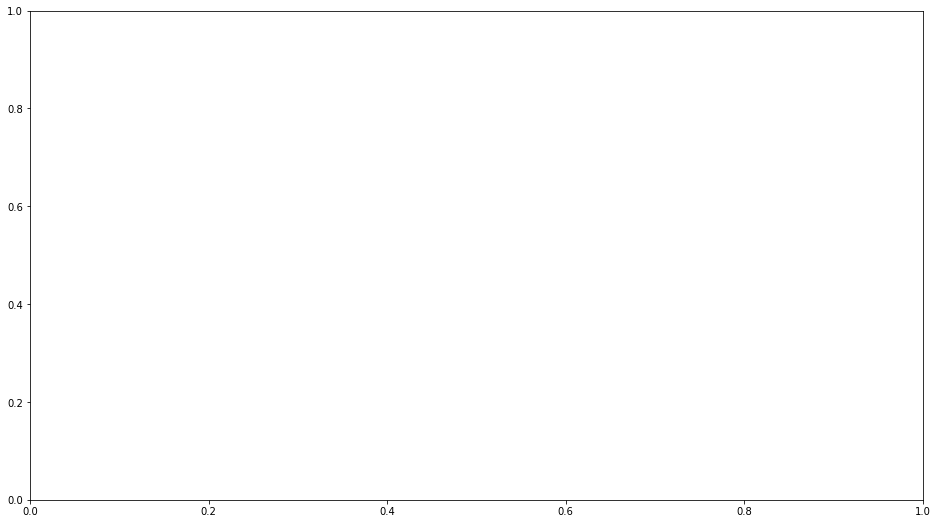

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
plt.show()

Now we see something, but its still far from a bar plot.
We can create barplots using plt.bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

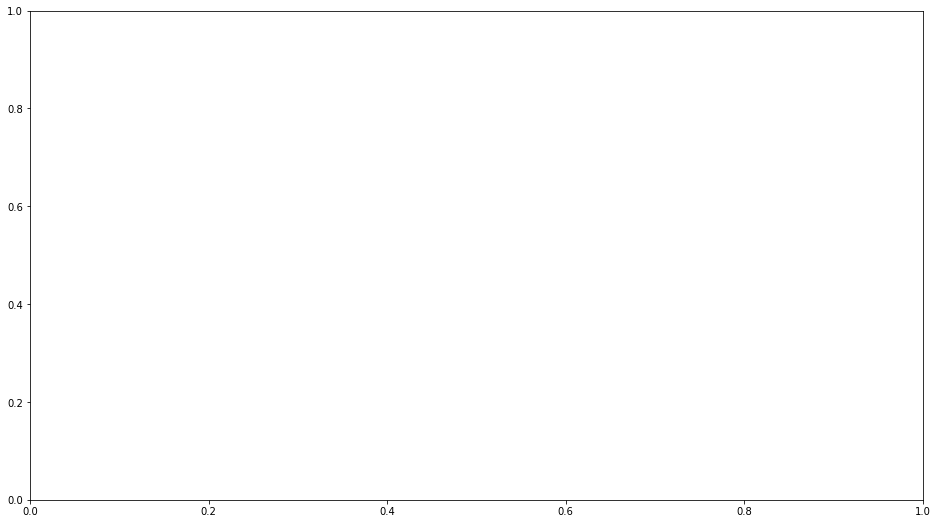

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
plt.bar()
plt.show()

This Error Message is quite handy. 
We just need to add x (name of the bars) 
and height

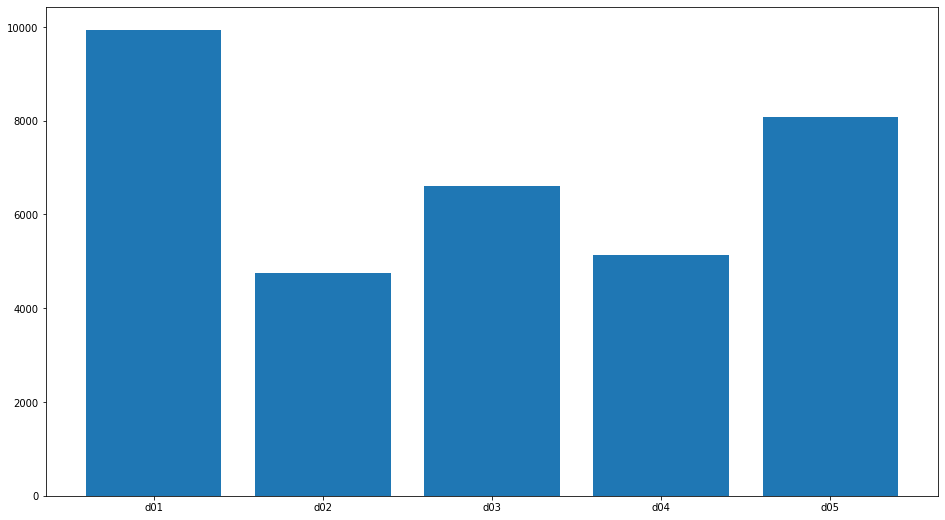

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
plt.bar(frame.index[:5], frame.iloc[:5,1])
plt.show()

Basicly thats it! But if you want to use this plot in any form of
publication you should invest a bit of time to enhance its 
appearacne.

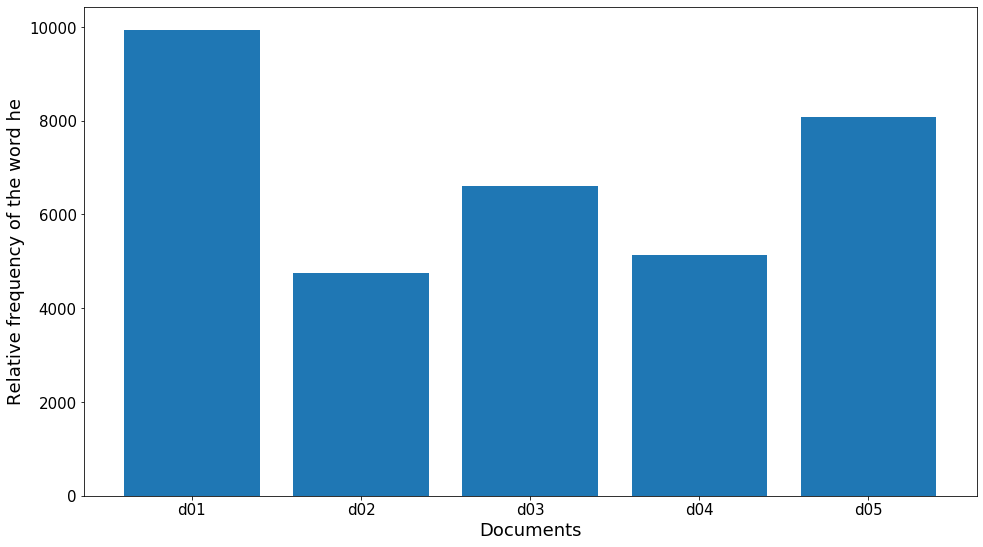

In [48]:
fig, ax = plt.subplots(figsize=(16,9))
plt.bar(frame.index[:5], frame.iloc[:5,1])
plt.ylabel("Relative frequency of the word he", size=18) # Label of y axis
plt.xlabel("Documents", size = 18) # Label of x axis
ax.tick_params(labelsize=15) # Size of tick labels
plt.show()